In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
partidas = pd.read_excel('tabela de jogos 2019_estudo posicao.xlsm', sheet_name = 'Planilha1')

## Estudo dos fatores que relacionados à ocorrência de cleansheets no brasileirão 2019

In [3]:
partidas.head()

,Rodada,idd,CasaID,PlacarCasa,PlacarVisitante,VisitanteID,diff_tec
0,1,1,GRE,1,2,SAN,0.0
1,1,2,CAM,2,1,AVA,0.0
2,1,3,CEA,4,0,CSA,0.0
3,1,4,PAL,4,0,FOR,0.0
4,1,5,SAO,2,0,BOT,0.0


### Quantos "cleansheets" ocorreram

In [4]:
mandanteCleanSheet = partidas[partidas['PlacarVisitante']==0]['PlacarVisitante'].count()
visitanteCleanSheet = partidas[partidas['PlacarCasa']==0]['PlacarCasa'].count()

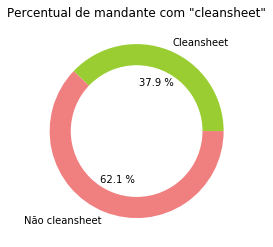

In [5]:
labels = ['Cleansheet', 'Não cleansheet']
colors = ['yellowgreen', 'lightcoral']
plt.pie([mandanteCleanSheet,380 - mandanteCleanSheet], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet"')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

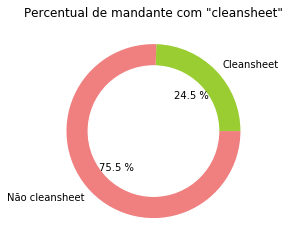

In [6]:
labels = ['Cleansheet','Não cleansheet']
colors = ['yellowgreen', 'lightcoral']
plt.pie([visitanteCleanSheet,380 - visitanteCleanSheet], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet"')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

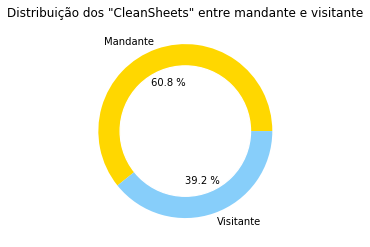

In [7]:
labels = ['Mandante', 'Visitante']
colors = ['gold', 'lightskyblue']
plt.pie([mandanteCleanSheet,visitanteCleanSheet], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Distribuição dos "CleanSheets" entre mandante e visitante')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

### Criando tabela com potencial ofensivo e defensivo

In [8]:
times=partidas['CasaID'].unique()

#### Soma acumulativa dos gols como mandante (feitos e sofridos)

In [9]:
#Fora - Ataque e Defesa    
partidas['ataqueFora'] = 0
partidas['defesaFora'] = 0
partidas['rodadaFora']= 0
for time in times:
    a1 = partidas[(partidas['VisitanteID'] == time)][['Rodada','CasaID', 'PlacarCasa', 'PlacarVisitante']].sort_values('Rodada')
    bIndex = partidas[(partidas['VisitanteID'] == time)][['Rodada','CasaID', 'PlacarCasa', 'PlacarVisitante']].sort_values('Rodada').index
    a1['ataqueFora']=a1['PlacarVisitante'].cumsum()
    a1['defesaFora'] = a1['PlacarCasa'].cumsum()
    b1 = a1['ataqueFora'][0:18] 
    a1['ataqueFora'][1:19] = b1
    c1 = a1['defesaFora'][0:18] 
    a1['defesaFora'][1:19] = c1
    a1['rodadaFora']=np.arange(1,20)
    partidas['ataqueFora'][bIndex] = a1['ataqueFora']
    partidas['defesaFora'][bIndex] = a1['defesaFora']
    partidas['rodadaFora'][bIndex]= a1['rodadaFora']

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import 

#### Soma acumulativa dos gols como visitante (feitos e sofridos)

In [10]:
partidas['ataqueCasa'] = 0
partidas['defesaCasa'] = 0
partidas['rodadaCasa'] = 0
for time in times:
#Casa - Ataque e Defesa
    a = partidas[(partidas['CasaID'] == time)][['Rodada','CasaID', 'PlacarCasa', 'PlacarVisitante']].sort_values('Rodada')
    aIndex = partidas[(partidas['CasaID'] == time)][['Rodada','CasaID', 'PlacarCasa', 'PlacarVisitante']].sort_values('Rodada').index
    a['ataqueCasa']=a['PlacarCasa'].cumsum()
    a['defesaCasa'] = a['PlacarVisitante'].cumsum()
    b = a['ataqueCasa'][0:18] 
    a['ataqueCasa'][1:19] = b
    c = a['defesaCasa'][0:18] 
    a['defesaCasa'][1:19] = c
    a['rodadaCasa']=np.arange(1,20)
    partidas['ataqueCasa'][aIndex] = a['ataqueCasa']
    partidas['defesaCasa'][aIndex] = a['defesaCasa']
    partidas['rodadaCasa'][aIndex]= a['rodadaCasa']
    
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#### Total de gols feitos e sofridos no campeonato (independente do mando) - Parte 1

In [11]:
partidas['VgolsFeitosTotal'] = 0
partidas['VgolsSofridosTotal'] = 0
partidas['MgolsFeitosTotal'] = 0
partidas['MgolsSofridosTotal'] = 0
rodada = 1
for time in times:
    golsFeitos = 0
    golsSofridos = 0
    rodada = 1
    while rodada < 39:
        jogos = partidas[((partidas['VisitanteID'] == time)|(partidas['CasaID'] == time))&
                        (partidas['Rodada'] == rodada)][['Rodada','VisitanteID','CasaID', 'PlacarCasa', 'PlacarVisitante']].sort_values('Rodada')
        jogosIndex = partidas[((partidas['VisitanteID'] == time)|(partidas['CasaID'] == time))&
                             (partidas['Rodada'] == rodada)][['Rodada','VisitanteID','CasaID', 'PlacarCasa', 'PlacarVisitante']].sort_values('Rodada').index
        visitante = jogos['VisitanteID'].item()
        mandante = jogos['CasaID'].item()
        if  visitante == time:
            golsFeitos = jogos['PlacarVisitante'].item() + golsFeitos
            golsSofridos = jogos['PlacarCasa'].item() + golsSofridos
            partidas['VgolsFeitosTotal'][jogosIndex] = golsFeitos
            partidas['VgolsSofridosTotal'][jogosIndex] = golsSofridos
        elif mandante == time:
            golsFeitos = jogos['PlacarCasa'].item() + golsFeitos
            golsSofridos = jogos['PlacarVisitante'].item() + golsSofridos
            partidas['MgolsFeitosTotal'][jogosIndex] = golsFeitos
            partidas['MgolsSofridosTotal'][jogosIndex] = golsSofridos
        rodada = rodada + 1        
        
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#### Total de gols feitos e sofridos no campeonato (independente do mando) - Parte 2

In [12]:
teste=['Rodada','CasaID','VisitanteID','PlacarCasa','PlacarVisitante', 'VgolsFeitosTotal', 'VgolsSofridosTotal',
       'MgolsFeitosTotal', 'MgolsSofridosTotal']

In [13]:
for time in times:
    rodada = 1
    while rodada < 39:
        deslocar = partidas[((partidas['CasaID']==time)|(partidas['VisitanteID']==time))&((partidas['Rodada']==rodada))][teste].sort_values('Rodada')
        index = partidas[((partidas['CasaID']==time)|(partidas['VisitanteID']==time))&((partidas['Rodada']==rodada))][teste].sort_values('Rodada').index
        #pegando o valor
        if deslocar['CasaID'].item() == time:
            if rodada == 1:
                ataque = 0
                defesa = 0    
            ataqueVelho = ataque
            defesaVelho = defesa
            ataque = deslocar['MgolsFeitosTotal'].item()
            defesa = deslocar['MgolsSofridosTotal'].item()
        #atribuindo o valor
            partidas['MgolsFeitosTotal'][index] = ataqueVelho
            partidas['MgolsSofridosTotal'][index] = defesaVelho
        
        elif deslocar['VisitanteID'].item() == time:
            if rodada == 1:
                ataque = 0
                defesa = 0
            ataqueVelho = ataque
            defesaVelho = defesa
            ataque = deslocar['VgolsFeitosTotal'].item()
            defesa = deslocar['VgolsSofridosTotal'].item()
        #atribuindo o valor
            partidas['VgolsFeitosTotal'][index] = ataqueVelho
            partidas['VgolsSofridosTotal'][index] = defesaVelho
        rodada += 1
        
        

In [14]:
partidas['mediaAtaqueFora'] = partidas['ataqueFora']/(partidas['rodadaFora'] -1)
partidas['mediaDefesaFora'] = partidas['defesaFora']/(partidas['rodadaFora'] -1)
partidas['mediaAtaqueCasa'] = partidas['ataqueCasa']/(partidas['rodadaCasa'] -1)
partidas['mediaDefesaCasa'] = partidas['defesaCasa']/(partidas['rodadaCasa'] -1)
partidas['mediaAtaqueVisTotal'] = partidas['VgolsFeitosTotal']/(partidas['Rodada'] -1)
partidas['mediaDefesaVisTotal'] = partidas['VgolsSofridosTotal']/(partidas['Rodada'] -1)
partidas['mediaAtaqueManTotal'] = partidas['MgolsFeitosTotal']/(partidas['Rodada'] -1)
partidas['mediaDefesaManTotal'] = partidas['MgolsSofridosTotal']/(partidas['Rodada'] -1)

In [15]:
partidas['soma'] = partidas['mediaAtaqueFora'] + partidas['mediaDefesaCasa']
partidas['somaTotal'] = partidas['mediaAtaqueVisTotal'] + partidas['mediaDefesaManTotal']

#### Média de gols feitos e sofridos nos últimos 3 jogos

In [16]:
partidas[partidas['Rodada']==1].head()

,Rodada,idd,CasaID,PlacarCasa,PlacarVisitante,VisitanteID,diff_tec,ataqueFora,defesaFora,rodadaFora,...,mediaAtaqueFora,mediaDefesaFora,mediaAtaqueCasa,mediaDefesaCasa,mediaAtaqueVisTotal,mediaDefesaVisTotal,mediaAtaqueManTotal,mediaDefesaManTotal,soma,somaTotal
0,1,1,GRE,1,2,SAN,0.0,2,1,1,...,inf,inf,inf,inf,NaN,NaN,NaN,NaN,inf,NaN
1,1,2,CAM,2,1,AVA,0.0,1,2,1,...,inf,inf,inf,inf,NaN,NaN,NaN,NaN,inf,NaN
2,1,3,CEA,4,0,CSA,0.0,0,4,1,...,NaN,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,PAL,4,0,FOR,0.0,0,4,1,...,NaN,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,SAO,2,0,BOT,0.0,0,2,1,...,NaN,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
partidas['MgolsFeitoM3'] = 0
partidas['MgolsSofridosM3'] = 0
partidas['VgolsFeitoM3'] = 0
partidas['VgolsSofridosM3']= 0
for time in times:
    rodada = 4
    while rodada < 39:
        descarte = partidas[((partidas['CasaID']==time)|(partidas['VisitanteID']==time))&(partidas['Rodada']==(rodada -3))][teste].sort_values('Rodada')
        deslocar = partidas[((partidas['CasaID']==time)|(partidas['VisitanteID']==time))&((partidas['Rodada']==rodada))][teste].sort_values('Rodada')
        index = partidas[((partidas['CasaID']==time)|(partidas['VisitanteID']==time))&((partidas['Rodada']==rodada))][teste].sort_values('Rodada').index
        #pegando o valor
        if descarte['CasaID'].item() == time:
            ataqueVelho = descarte['MgolsFeitosTotal'].item()   
            defesaVelho = descarte['MgolsSofridosTotal'].item()
        if descarte['VisitanteID'].item() == time:
            ataqueVelho = descarte['VgolsFeitosTotal'].item()   
            defesaVelho = descarte['VgolsSofridosTotal'].item()
            
        if deslocar['CasaID'].item() == time:
            ataque = (deslocar['MgolsFeitosTotal'].item() - ataqueVelho)/3
            defesa = (deslocar['MgolsSofridosTotal'].item()-defesaVelho)/3
        #atribuindo o valor
            partidas['MgolsFeitoM3'][index] = ataque
            partidas['MgolsSofridosM3'][index] = defesa
        
        elif deslocar['VisitanteID'].item() == time:
            ataque = (deslocar['VgolsFeitosTotal'].item() - ataqueVelho)/3
            defesa = (deslocar['VgolsSofridosTotal'].item()-defesaVelho)/3
        #atribuindo o valor
            partidas['VgolsFeitoM3'][index] = ataque
            partidas['VgolsSofridosM3'][index] = defesa        
        rodada += 1

In [18]:
teste=['Rodada','CasaID','VisitanteID','PlacarCasa','PlacarVisitante', 'VgolsFeitosTotal', 'VgolsSofridosTotal',
       'MgolsFeitosTotal', 'MgolsSofridosTotal','VgolsFeitoM3','VgolsSofridosM3','MgolsFeitoM3','MgolsSofridosM3']

In [19]:
#partidas[(partidas['CasaID']==277)|(partidas['VisitanteID']==277)][teste].sort_values('Rodada')
partidas['somaM3'] = partidas['VgolsFeitoM3'] + partidas['MgolsSofridosM3']
partidas.columns

Index(['Rodada', 'idd', 'CasaID', 'PlacarCasa', 'PlacarVisitante',
       'VisitanteID', 'diff_tec', 'ataqueFora', 'defesaFora', 'rodadaFora',
       'ataqueCasa', 'defesaCasa', 'rodadaCasa', 'VgolsFeitosTotal',
       'VgolsSofridosTotal', 'MgolsFeitosTotal', 'MgolsSofridosTotal',
       'mediaAtaqueFora', 'mediaDefesaFora', 'mediaAtaqueCasa',
       'mediaDefesaCasa', 'mediaAtaqueVisTotal', 'mediaDefesaVisTotal',
       'mediaAtaqueManTotal', 'mediaDefesaManTotal', 'soma', 'somaTotal',
       'MgolsFeitoM3', 'MgolsSofridosM3', 'VgolsFeitoM3', 'VgolsSofridosM3',
       'somaM3'],
      dtype='object')

### Como a média de gols sofridos em casa afeta a chance de "Cleansheet"

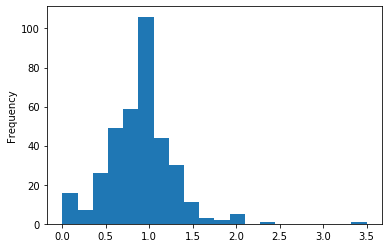

In [20]:
partidas[partidas['mediaDefesaCasa']<5]['mediaDefesaCasa'].plot.hist(bins = 20)

In [21]:
t1 = partidas[(partidas['mediaDefesaCasa']<10)&(partidas['Rodada']>=4)]['mediaDefesaCasa'].quantile(0.34)
t2 = partidas[(partidas['mediaDefesaCasa']<10)&(partidas['Rodada']>=4)]['mediaDefesaCasa'].quantile(0.66)
percentils = [round(t1,1), round(t2,1)]
percentils

[0.8, 1.0]

In [22]:
mandanteCleanSheet = partidas[partidas['PlacarVisitante']==0]['PlacarVisitante'].count()
m1 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['mediaDefesaCasa']<=t1)&
              (partidas['rodadaCasa'] >3)]['PlacarVisitante'].count()
m1No = partidas[(partidas['mediaDefesaCasa']<=t1)&
              (partidas['rodadaCasa'] >3)]['PlacarVisitante'].count()

m2 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['mediaDefesaCasa']>t1)&(partidas['mediaDefesaCasa']<t2)&
              (partidas['rodadaCasa'] >3)]['PlacarVisitante'].count()
m2No =partidas[(partidas['mediaDefesaCasa']>t1)&(partidas['mediaDefesaCasa']<t2)&
              (partidas['rodadaCasa'] >3)]['PlacarVisitante'].count()

m3 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['mediaDefesaCasa']>=t2)&
              (partidas['rodadaCasa'] >3)]['PlacarVisitante'].count() 
m3No = partidas[(partidas['mediaDefesaCasa']>=t2)&
              (partidas['rodadaCasa'] >3)]['PlacarVisitante'].count() 
contagem = [m1No,m2No,m3No]
contagem

[110, 77, 133]

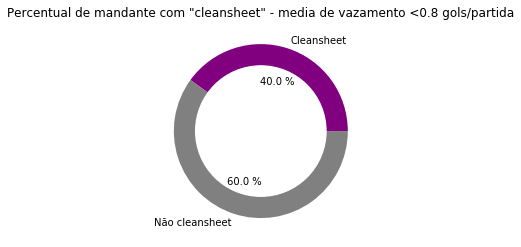

In [23]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m1,m1No - m1], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - media de vazamento <0.8 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

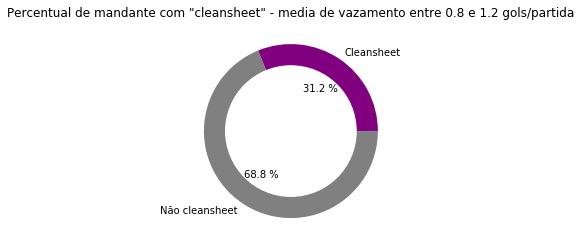

In [24]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m2,m2No - m2], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - media de vazamento entre 0.8 e 1.2 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

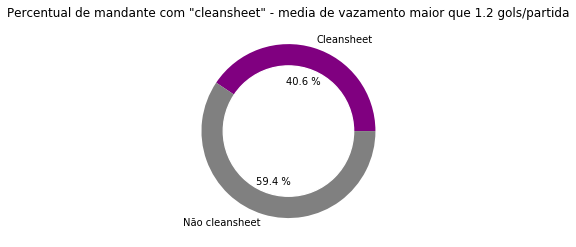

In [25]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m3,m3No - m3], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - media de vazamento maior que 1.2 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

### Influência do poderio ofensivo fora de casa do oponente na chance de cleansheet do mandante

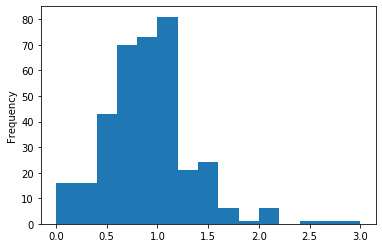

In [26]:
partidas[partidas['mediaAtaqueFora']<5]['mediaAtaqueFora'].plot.hist(bins = 15)

In [27]:
t1 = partidas[(partidas['mediaAtaqueFora']<10)&(partidas['Rodada']>=4)]['mediaAtaqueFora'].quantile(0.34)
t2 = partidas[(partidas['mediaAtaqueFora']<10)&(partidas['Rodada']>=4)]['mediaAtaqueFora'].quantile(0.66)
percentils = [round(t1,1), round(t2,1)]
percentils

[0.8, 1.0]

In [28]:
mandanteCleanSheet = partidas[partidas['PlacarVisitante']==0]['PlacarVisitante'].count()
m1 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['mediaAtaqueFora']<=t1)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count()
m1No = partidas[(partidas['mediaAtaqueFora']<=t1)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count()

m2 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['mediaAtaqueFora']>t1)&(partidas['mediaAtaqueFora']<t2)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count()
m2No =partidas[(partidas['mediaAtaqueFora']>t1)&(partidas['mediaAtaqueFora']<t2)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count()

m3 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['mediaAtaqueFora']>=t2)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count() 
m3No = partidas[(partidas['mediaAtaqueFora']>=t2)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count() 
contagem = [m1No,m2No,m3No]
contagem

[118, 85, 117]

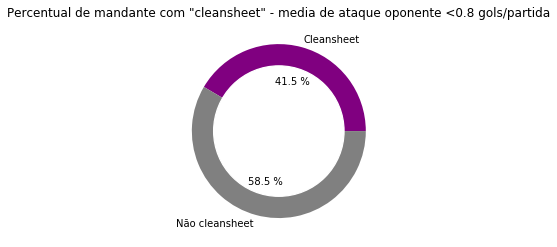

In [29]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m1,m1No - m1], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - media de ataque oponente <0.8 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

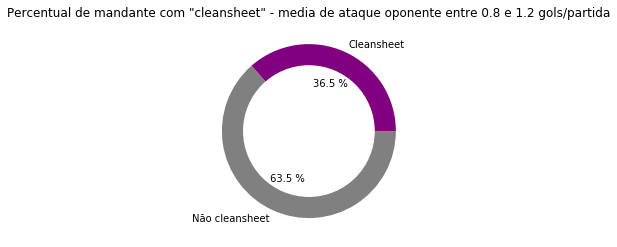

In [30]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m2,m2No - m2], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - media de ataque oponente entre 0.8 e 1.2 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

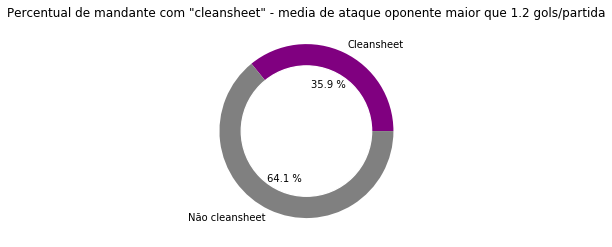

In [31]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m3,m3No - m3], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - media de ataque oponente maior que 1.2 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

### Soma da fraqueza defensiva do mandante e poderio ofensivo do visitante 

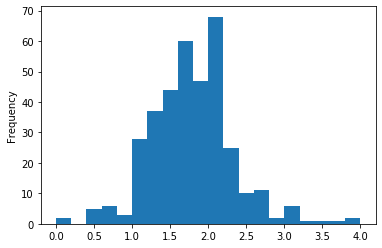

In [32]:
partidas[partidas['soma']<5]['soma'].plot.hist(bins = 20)

In [33]:
t1 = partidas[(partidas['soma']<10)&(partidas['Rodada']>=4)]['soma'].quantile(0.34)
t2 = partidas[(partidas['soma']<10)&(partidas['Rodada']>=4)]['soma'].quantile(0.66)
percentils = [round(t1,1), round(t2,1)]
percentils

[1.6, 2.0]

In [34]:
m1 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['soma']<=t1)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count()
m1No = partidas[(partidas['soma']<=t1)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count()

m2 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['soma']>t1)&(partidas['soma']<t2)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count()
m2No =partidas[(partidas['soma']>t1)&(partidas['soma']<t2)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count()

m3 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['soma']>=t2)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count() 
m3No = partidas[(partidas['soma']>=t2)&
              (partidas['rodadaFora'] >3)]['PlacarVisitante'].count() 
contagem = [m1No,m2No,m3No]
contagem

[106, 108, 106]

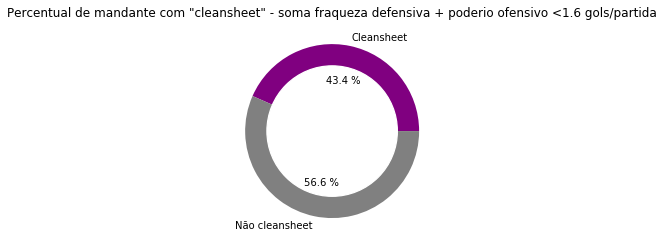

In [35]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m1,m1No - m1], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - soma fraqueza defensiva + poderio ofensivo <1.6 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

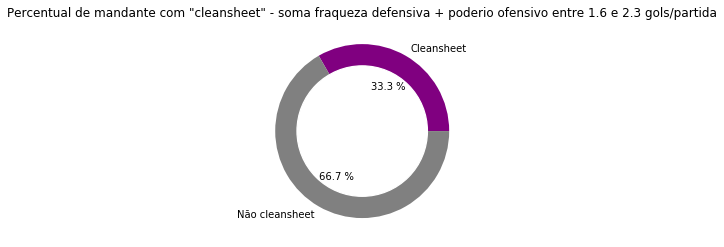

In [36]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m2,m2No - m2], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - soma fraqueza defensiva + poderio ofensivo entre 1.6 e 2.3 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

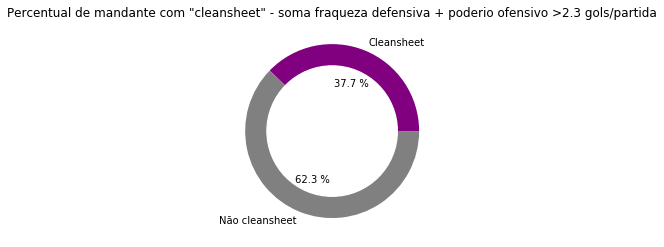

In [37]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m3,m3No - m3], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - soma fraqueza defensiva + poderio ofensivo >2.3 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [38]:
partidas.columns

Index(['Rodada', 'idd', 'CasaID', 'PlacarCasa', 'PlacarVisitante',
       'VisitanteID', 'diff_tec', 'ataqueFora', 'defesaFora', 'rodadaFora',
       'ataqueCasa', 'defesaCasa', 'rodadaCasa', 'VgolsFeitosTotal',
       'VgolsSofridosTotal', 'MgolsFeitosTotal', 'MgolsSofridosTotal',
       'mediaAtaqueFora', 'mediaDefesaFora', 'mediaAtaqueCasa',
       'mediaDefesaCasa', 'mediaAtaqueVisTotal', 'mediaDefesaVisTotal',
       'mediaAtaqueManTotal', 'mediaDefesaManTotal', 'soma', 'somaTotal',
       'MgolsFeitoM3', 'MgolsSofridosM3', 'VgolsFeitoM3', 'VgolsSofridosM3',
       'somaM3'],
      dtype='object')

### Influência da média total de gols sofridos pelo mandante e feitos pelo visitante na ocorrência de "cleansheet"

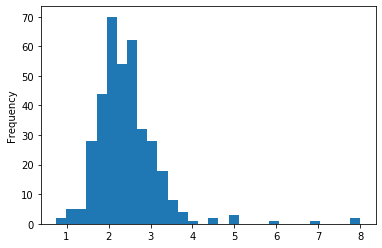

In [39]:
partidas[partidas['somaTotal']<10]['somaTotal'].plot.hist(bins = 30)

In [40]:
t1 = partidas[(partidas['somaTotal']<10)&(partidas['Rodada']>=4)]['somaTotal'].quantile(0.34)
t2 = partidas[(partidas['somaTotal']<10)&(partidas['Rodada']>=4)]['somaTotal'].quantile(0.66)
listinha = [round(t1,1), round(t2,1)]
listinha


[2.1, 2.5]

In [41]:
m1 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['somaTotal']<=t1)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count()
m1No = partidas[(partidas['somaTotal']<=t1)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count()

m2 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['somaTotal']>t1)&(partidas['somaTotal']<t2)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count()
m2No =partidas[(partidas['somaTotal']>t1)&(partidas['somaTotal']<t2)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count()

m3 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['somaTotal']>=t2)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count() 
m3No = partidas[(partidas['somaTotal']>=t2)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count() 
contagens = [m1No, m2No,m3No]
contagens

[119, 112, 119]

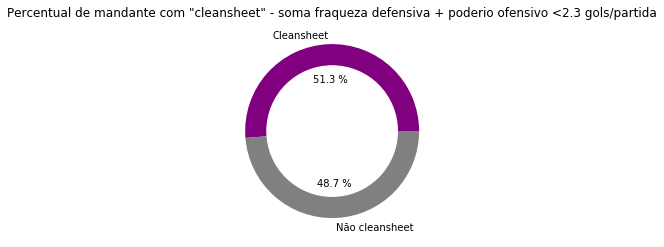

In [42]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m1,m1No - m1], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - soma fraqueza defensiva + poderio ofensivo <2.3 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

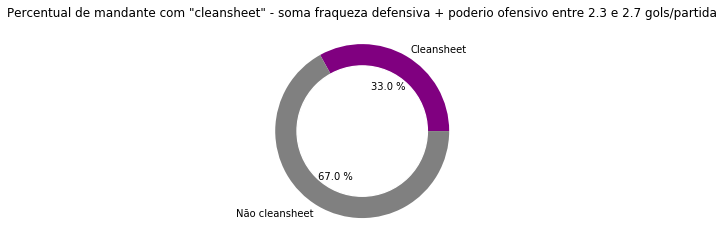

In [43]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m2,m2No - m2], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - soma fraqueza defensiva + poderio ofensivo entre 2.3 e 2.7 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

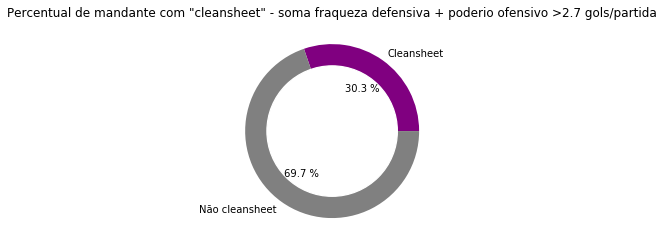

In [44]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m3,m3No - m3], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - soma fraqueza defensiva + poderio ofensivo >2.7 gols/partida')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [45]:
partidas.columns

Index(['Rodada', 'idd', 'CasaID', 'PlacarCasa', 'PlacarVisitante',
       'VisitanteID', 'diff_tec', 'ataqueFora', 'defesaFora', 'rodadaFora',
       'ataqueCasa', 'defesaCasa', 'rodadaCasa', 'VgolsFeitosTotal',
       'VgolsSofridosTotal', 'MgolsFeitosTotal', 'MgolsSofridosTotal',
       'mediaAtaqueFora', 'mediaDefesaFora', 'mediaAtaqueCasa',
       'mediaDefesaCasa', 'mediaAtaqueVisTotal', 'mediaDefesaVisTotal',
       'mediaAtaqueManTotal', 'mediaDefesaManTotal', 'soma', 'somaTotal',
       'MgolsFeitoM3', 'MgolsSofridosM3', 'VgolsFeitoM3', 'VgolsSofridosM3',
       'somaM3'],
      dtype='object')

### Influência da diferença entre ataque do visitante e defesa do mandante nos últimos 3 jogos

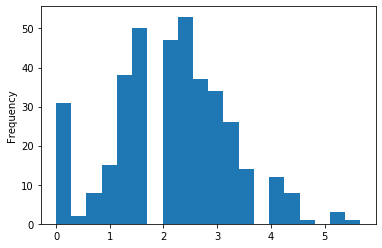

In [46]:
partidas[partidas['somaM3']<20]['somaM3'].plot.hist(bins = 20)

In [47]:
t1 = partidas[(partidas['somaM3']<20)&(partidas['Rodada']>=4)]['somaM3'].quantile(0.34)
t2 = partidas[(partidas['somaM3']<20)&(partidas['Rodada']>=4)]['somaM3'].quantile(0.66)
t3 = partidas[(partidas['somaM3']<20)&(partidas['Rodada']>=4)]['somaM3'].max()
listinha = [round(t1,1), round(t2,1)]
listinha

[2.0, 2.7]

In [48]:
m1 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['somaM3']<=t1)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count()
m1No = partidas[(partidas['somaM3']<=t1)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count()

m2 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['somaM3']>t1)&(partidas['somaM3']<t2)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count()
m2No =partidas[(partidas['somaM3']>t1)&(partidas['somaM3']<t2)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count()

m3 = partidas[(partidas['PlacarVisitante']==0)&
              (partidas['somaM3']>=t2)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count() 
m3No = partidas[(partidas['somaM3']>=t2)&
              (partidas['Rodada'] >3)]['PlacarVisitante'].count() 
contagens = [m1No, m2No,m3No]
sum(contagens)

350

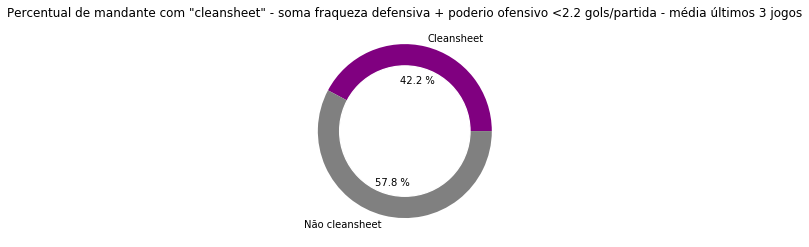

In [49]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m1,m1No - m1], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - soma fraqueza defensiva + poderio ofensivo <2.2 gols/partida - média últimos 3 jogos')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

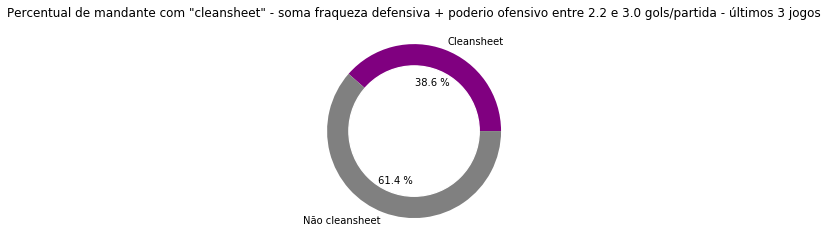

In [50]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m2,m2No - m2], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - soma fraqueza defensiva + poderio ofensivo entre 2.2 e 3.0 gols/partida - últimos 3 jogos')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

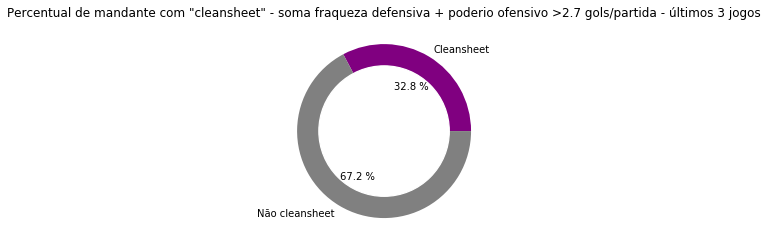

In [51]:
labels = ['Cleansheet','Não cleansheet']
colors = ['purple', 'gray']
plt.pie([m3,m3No - m3], labels = labels, colors = colors, autopct = '%.1f %%')
plt.title('Percentual de mandante com "cleansheet" - soma fraqueza defensiva + poderio ofensivo >2.7 gols/partida - últimos 3 jogos')
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [53]:
partidas.columns

Index(['Rodada', 'idd', 'CasaID', 'PlacarCasa', 'PlacarVisitante',
       'VisitanteID', 'diff_tec', 'ataqueFora', 'defesaFora', 'rodadaFora',
       'ataqueCasa', 'defesaCasa', 'rodadaCasa', 'VgolsFeitosTotal',
       'VgolsSofridosTotal', 'MgolsFeitosTotal', 'MgolsSofridosTotal',
       'mediaAtaqueFora', 'mediaDefesaFora', 'mediaAtaqueCasa',
       'mediaDefesaCasa', 'mediaAtaqueVisTotal', 'mediaDefesaVisTotal',
       'mediaAtaqueManTotal', 'mediaDefesaManTotal', 'soma', 'somaTotal',
       'MgolsFeitoM3', 'MgolsSofridosM3', 'VgolsFeitoM3', 'VgolsSofridosM3',
       'somaM3'],
      dtype='object')